In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
data['horsepower']=data['horsepower'].replace('?',np.nan)

In [3]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [4]:
data['horsepower']=data['horsepower'].astype(float)
mean1=data['horsepower'].mean()
data['horsepower'].fillna(value=mean1,inplace=True)

<AxesSubplot:>

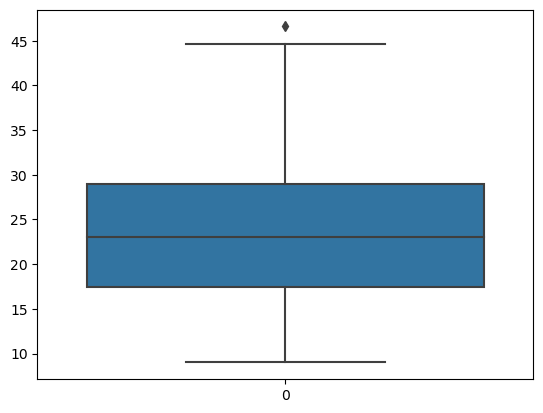

In [5]:
sns.boxplot(data=data.mpg)

<AxesSubplot:>

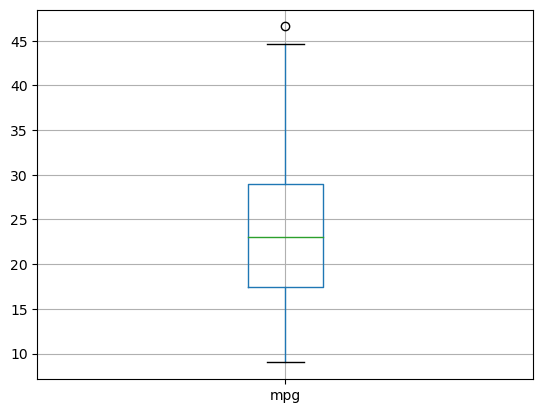

In [6]:
data.boxplot('mpg')


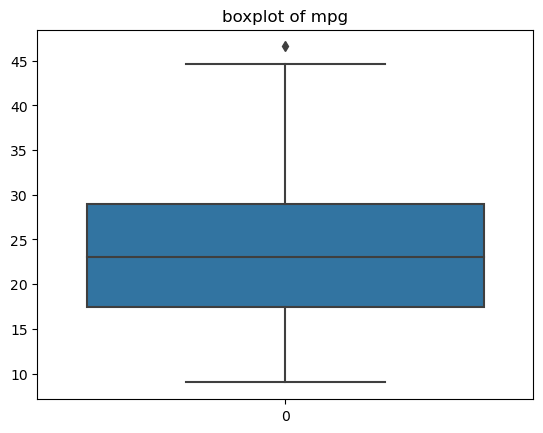

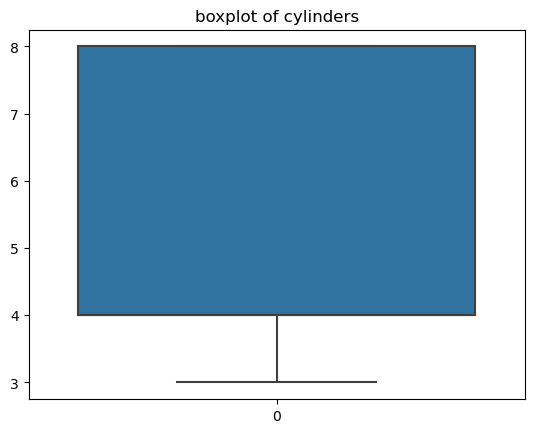

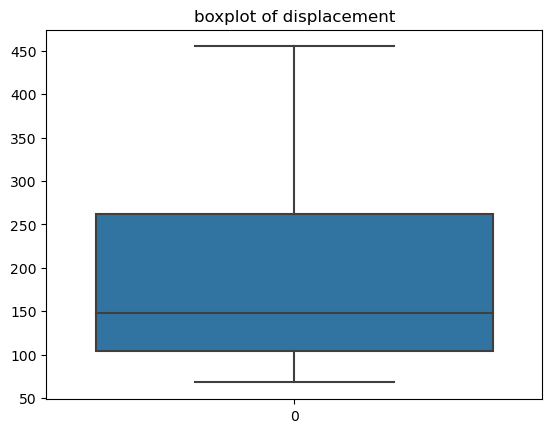

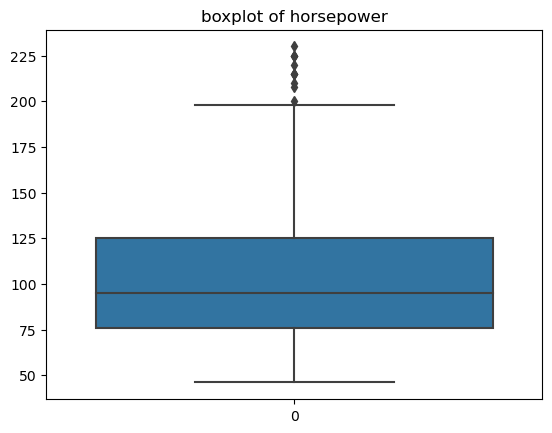

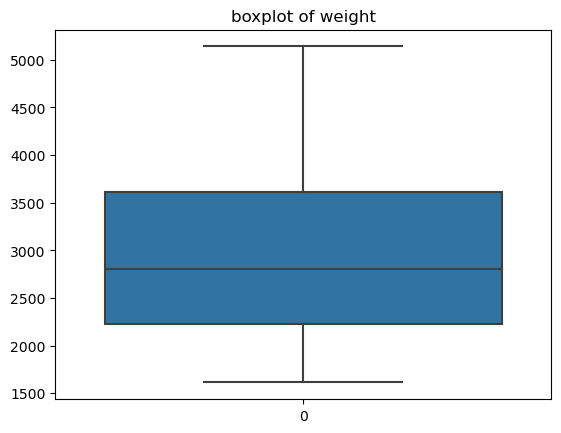

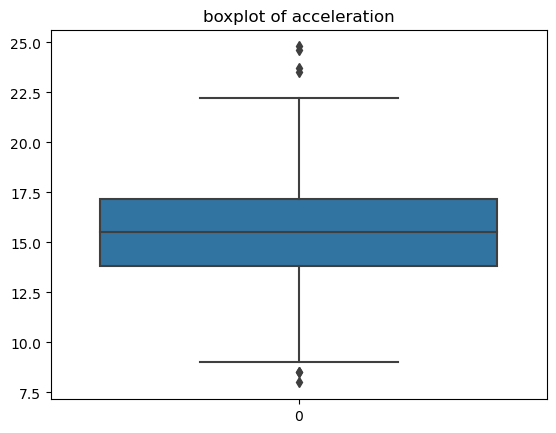

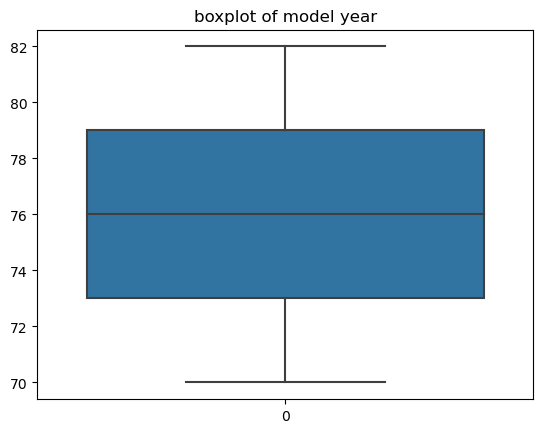

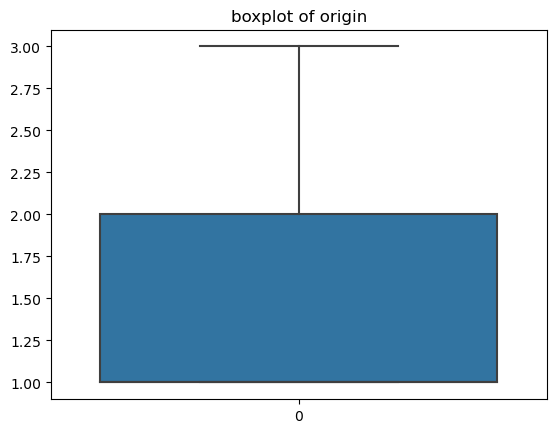

In [9]:
for col in data.columns:
    sns.boxplot(data=data[col],showfliers=True)
    plt.title(f'boxplot of {col}')
    plt.show()
    

In [8]:
data=data.iloc[:,:-1]

In [10]:
p25=np.percentile(data,25)
p50=np.percentile(data,50) #median
p75=np.percentile(data,75)
#print percentile values
print('25th percentile(Q1)',p25)
print('50th percentile(Q2)',p50)
print('75th percentile(Q3)',p75)


25th percentile(Q1) 8.0
50th percentile(Q2) 46.0
75th percentile(Q3) 110.0


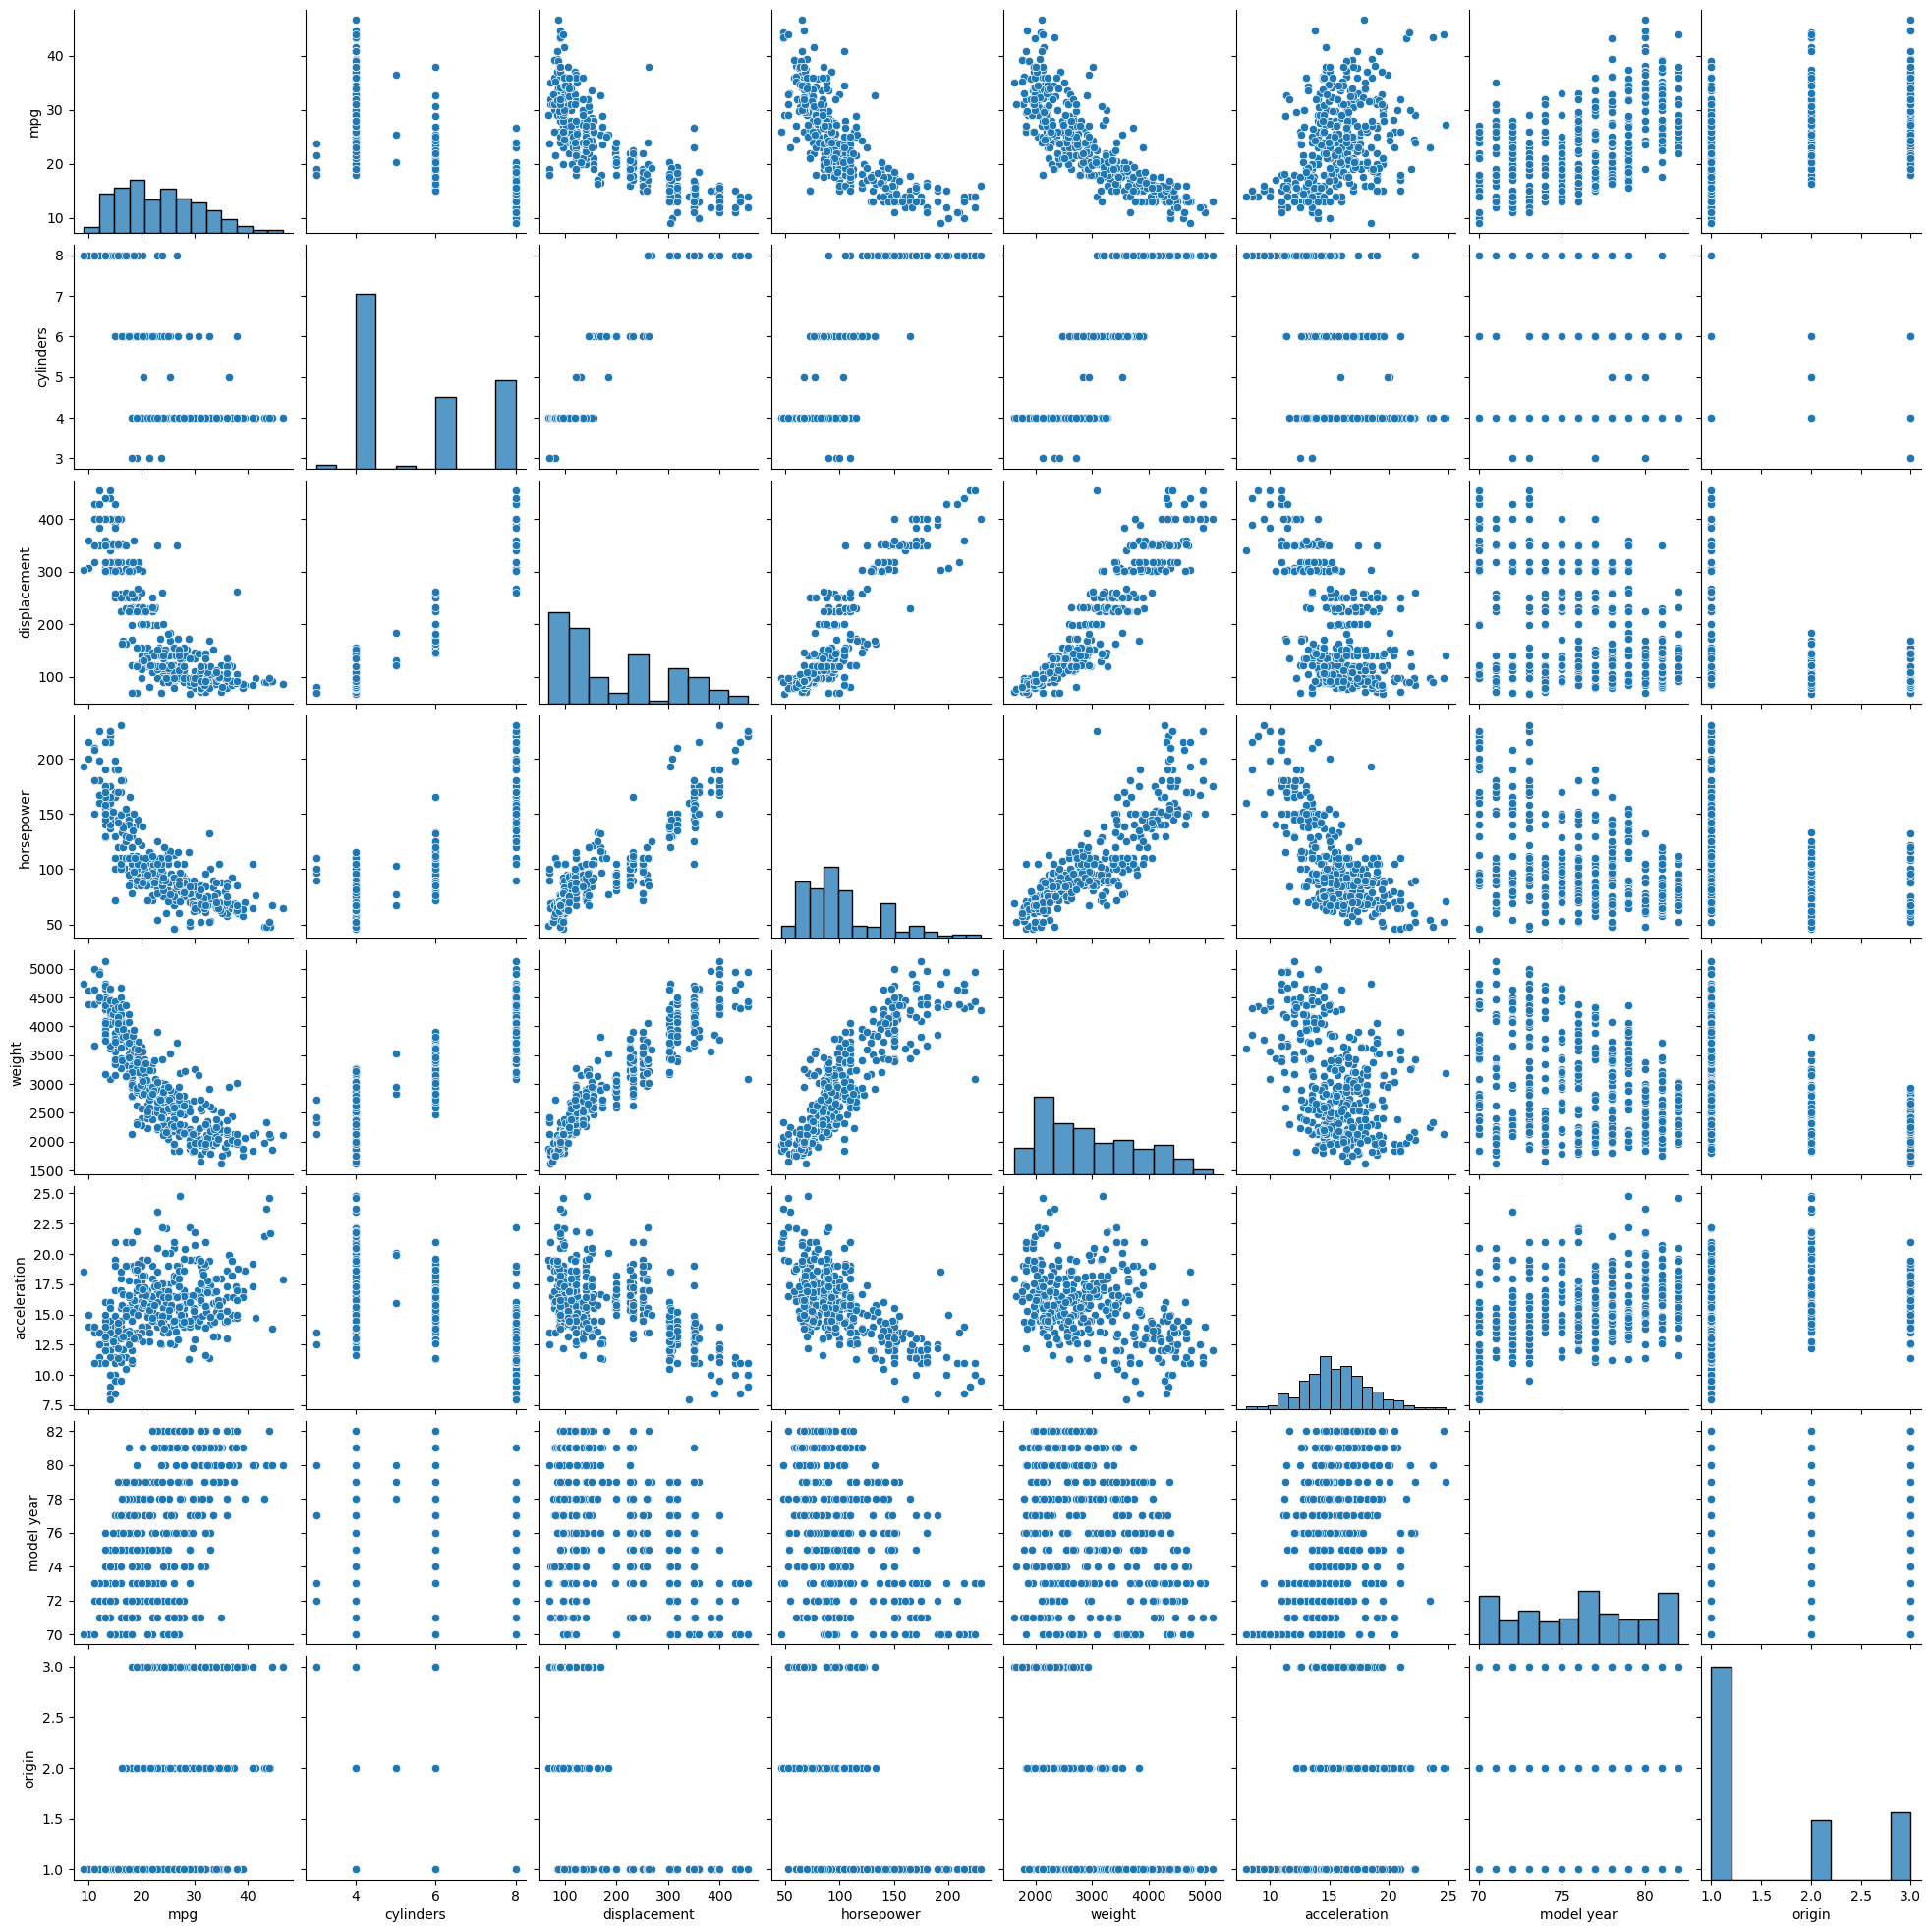

In [11]:
sns.pairplot(data)

In [12]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [15]:
IQR=p75-p25
upper_whisker= p75 + 1.5*IQR
lower_whisker = p25 - 1.5*IQR
print(IQR)
print(upper_whisker)
print(lower_whisker)

102.0
263.0
-145.0


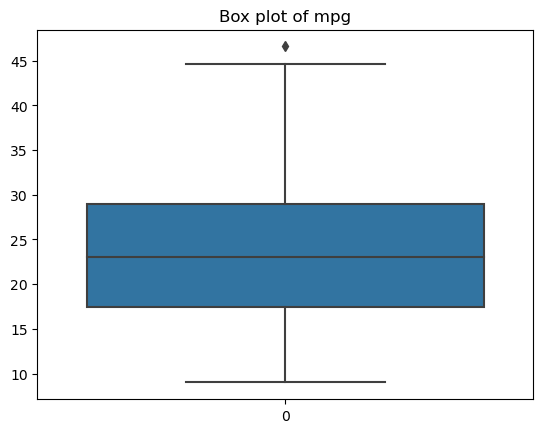

				Q1 = 17.5
				Q3 = 29.0
				IQR = 11.5
				Outliers: [46.6]



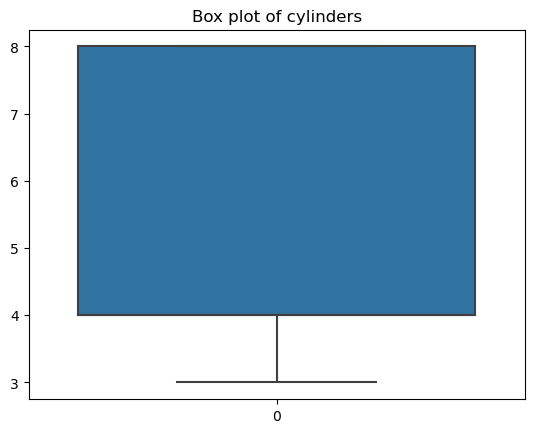

				Q1 = 4.0
				Q3 = 8.0
				IQR = 4.0
				No outliers found.



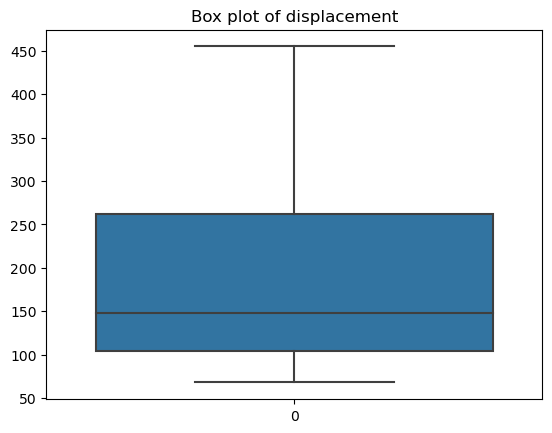

				Q1 = 104.25
				Q3 = 262.0
				IQR = 157.75
				No outliers found.



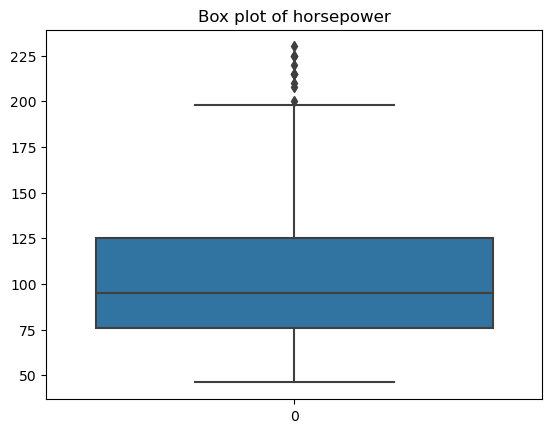

				Q1 = 76.0
				Q3 = 125.0
				IQR = 49.0
				Outliers: [220. 215. 225. 225. 215. 200. 210. 208. 215. 225. 230.]



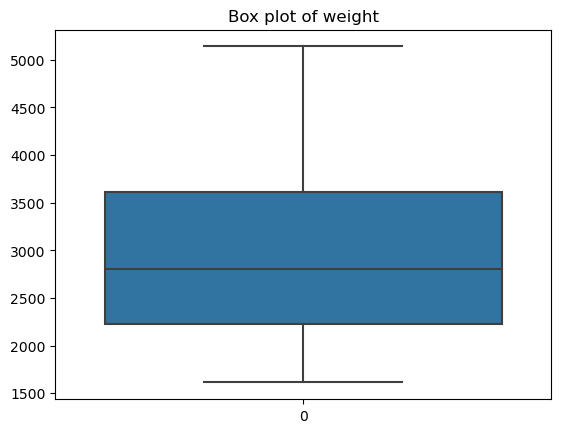

				Q1 = 2223.75
				Q3 = 3608.0
				IQR = 1384.25
				No outliers found.



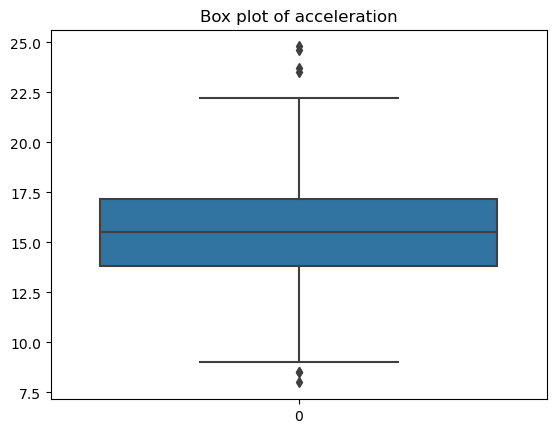

				Q1 = 13.825000000000001
				Q3 = 17.175
				IQR = 3.3499999999999996
				Outliers: [ 8.5  8.5  8.  23.5 24.8 23.7 24.6]



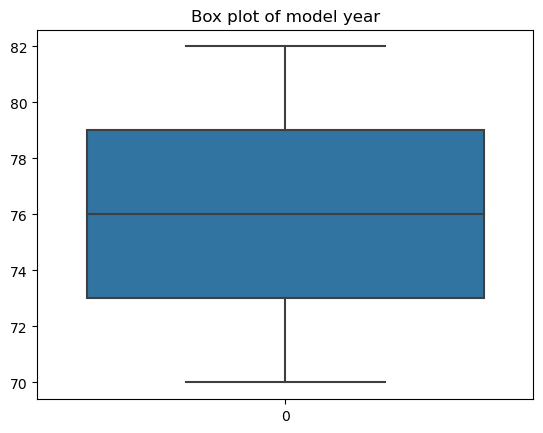

				Q1 = 73.0
				Q3 = 79.0
				IQR = 6.0
				No outliers found.



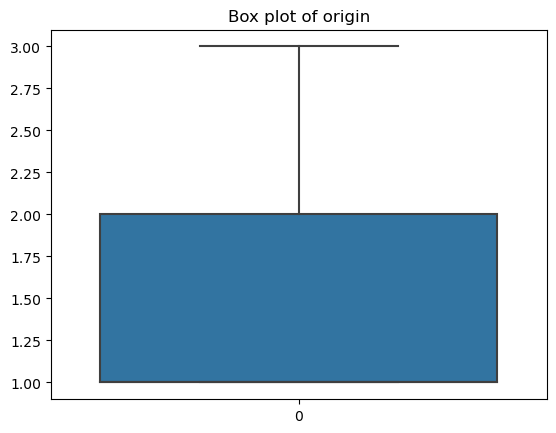

				Q1 = 1.0
				Q3 = 2.0
				IQR = 1.0
				No outliers found.



In [18]:
for column in data.columns:
    sns.boxplot(data=data[column], showfliers=True)
    plt.title(f'Box plot of {column}')
    plt.show()
    print("\t\t\t\tQ1 =", data[column].quantile(0.25))
    print("\t\t\t\tQ3 =", data[column].quantile(0.75))
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    print("\t\t\t\tIQR =", IQR)
    threshold = 1.5 * IQR
    lower_bound = Q1 - threshold
    upper_bound = Q3 + threshold
    outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]
    if not outliers.empty:
        print("\t\t\t\tOutliers:", outliers.values)
    else:
        print("\t\t\t\tNo outliers found.")
    print()
            

In [ ]:
def replace_outliers_with_bounds(data,threshold_multiplier=1.5):\
    data_copy = data.copy()
    for column in data.columns:
        Q1=data[column].quantile(0.25)
        Q2=data[column].quantile(0.75)
        IQR= Q3-Q1
        lower_bound= Q1-threshold_multiplier*IQR
        upper_bound= Q3+threshold_multiplier*IQR
        data[column]= np.where(data_copy[column])